In [1]:
import tensorflow.keras
from tensorflow.keras import layers, models, optimizers
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session
import tensorflow.keras
config = ConfigProto(allow_soft_placement=True)

config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(Session(config=config))

In [2]:
model_path = '/home/oneran/Documents/Dog-vs-Cats'
model = models.load_model(model_path)

img_path = '/home/oneran/dog-vs-cats/train/train_cat_img/cat.95.jpg'
img = image.load_img(img_path)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor / 255.

In [3]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [4]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [5]:
activations = activation_model.predict(img_tensor)

In [6]:
activations[5].shape

(1, 17, 17, 128)

In [7]:
# for i, img in enumerate(activations[5].reshape([17, 17, 128]).swapaxes(1,2).swapaxes(0,1)):
#     plt.figure(1)
#     plt.matshow(img)

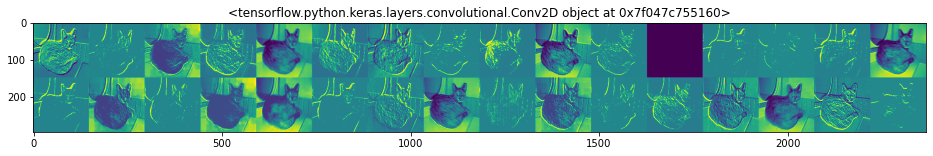

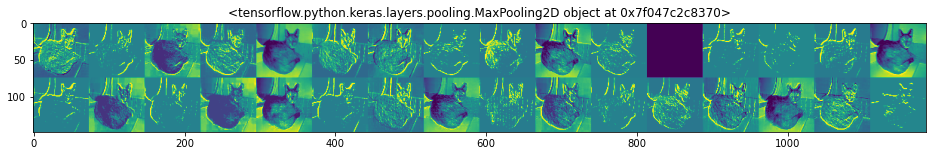

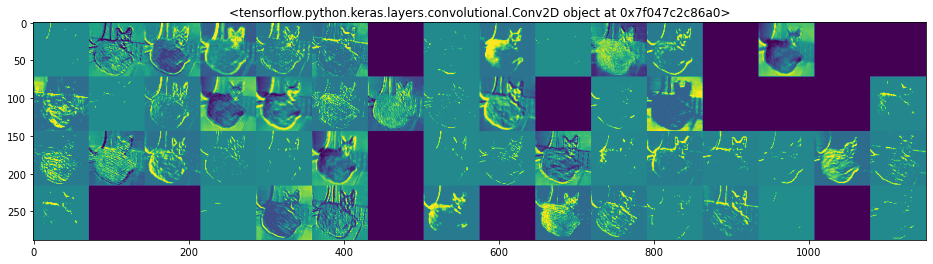

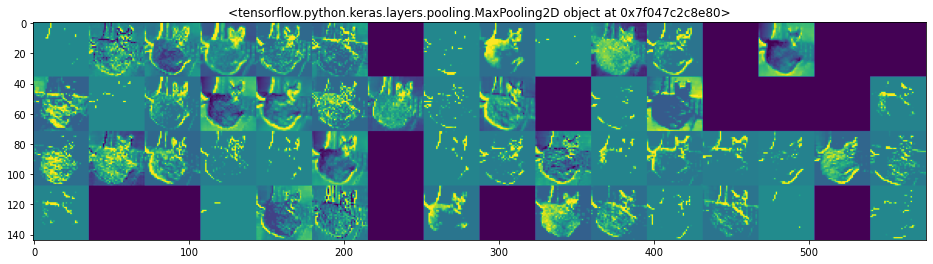

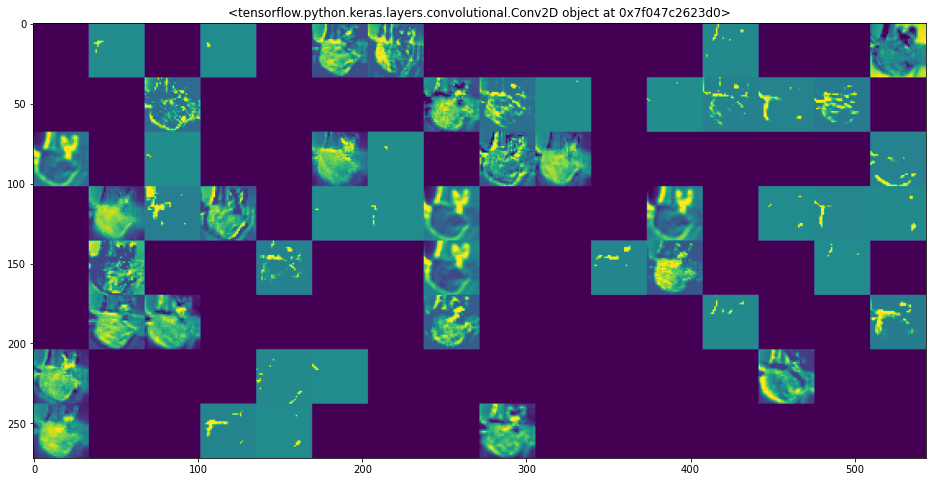

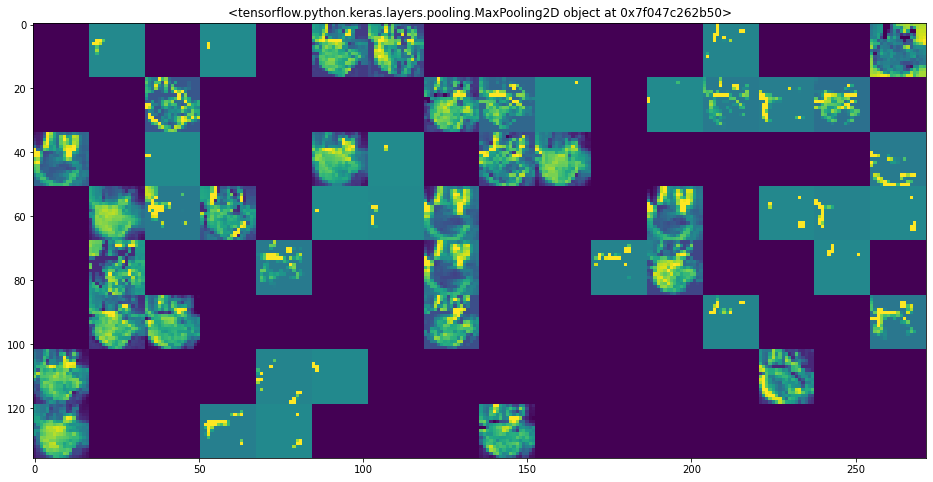

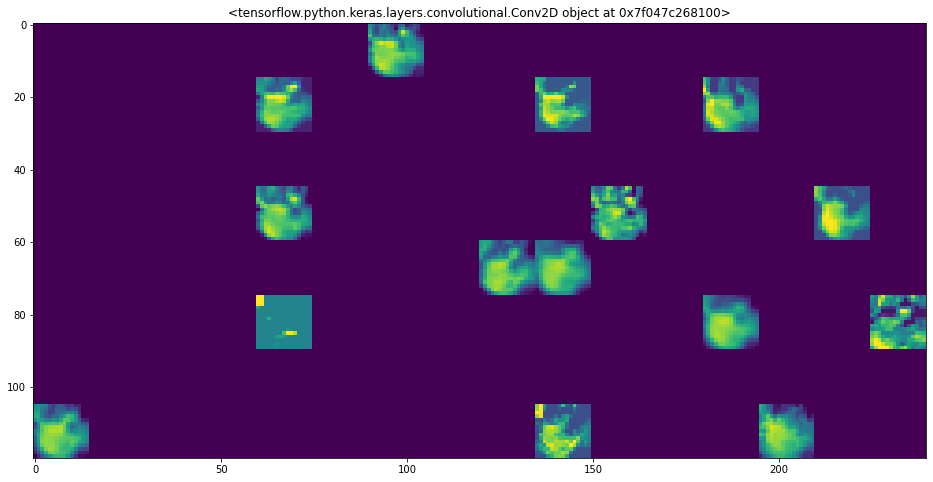

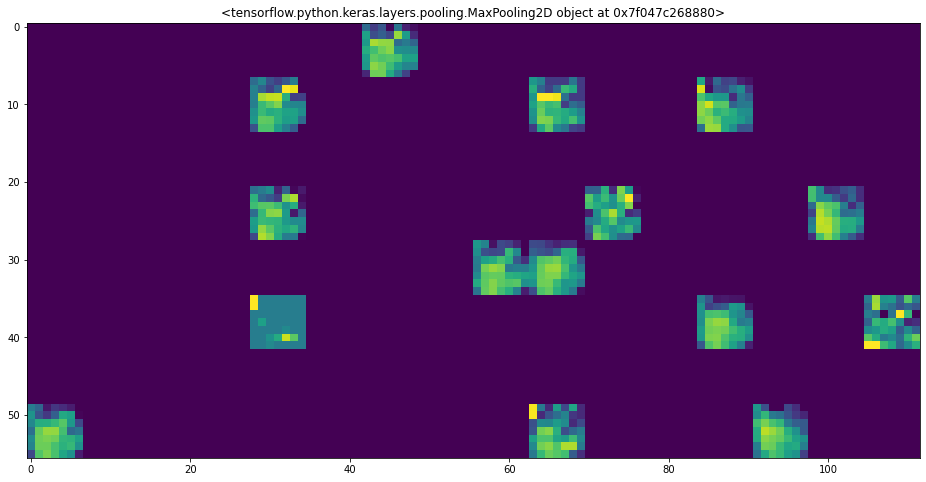

In [9]:
layer_name = []
for layer in model.layers:
    layer_name.append(layer)

image_per_row = 16

for layer_name, layer_activation in zip(layer_name, activations):
    n_feature = layer_activation.shape[-1]  #特征图中特征个数  滤波器个数

    size = layer_activation.shape[1]        #特征图的size

    n_cols = n_feature // image_per_row     #将激活图放在图像矩阵中 此处为列数
    display_grid = np.zeros((size * n_cols, image_per_row * size))  #生成汇总特征图矩阵的特点

    for col in range(n_cols):               #遍历 以及标准化数据处理
        for row in range(image_per_row):
            channel_image = layer_activation[0, :, :, col * image_per_row + row]    #最后一个维度为滤波器的个数
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            #使得图像较为美观

            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col+1) * size, row * size : (row+1) * size] = channel_image
    scale = 1. / size               #缩放比例
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
